## **Analysis of losses of the ProcrastinatePRO+ application** ##

**About the project**  
Despite large investments in advertising of the entertainment application Procrastinate Pro+, the company has been suffering losses for the last few months.  
**Task:**  
- understand the causes of losses
- give recommendations for setting up advertising   

## Data ##

**Data for analysis:** users attracted from **May 1 to October 27, 2019**   

Dataset **visits_info_short.csv**:
* User Id - unique user identifier,
* Region — user country,
* Device — user device type,
* Channel — transition source identifier,
* Session Start - date and time of the start of the session,
* Session End - date and time of the end of the session.

Dataset **orders_info_short.csv**:
* User Id - unique user identifier,
* Event Dt - date and time of purchase,
* Revenue — order amount.

Dataset **costs_info_short.csv**:
* dt — date of the advertising campaign,
* Channel — advertising source identifier,
* costs — costs for this campaign.

## Data pre-processing ##

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
def first_look (data):
    print('First 10 rows')
    display(data.head(10))
    print('Data type\n')
    display(data.info())
    print('Statistics')
    display(data.describe())
    print('Data gaps:\n')
    display(data.isna().sum())
    print('Share of gaps in dataframe')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('Duplicates:\n')
    if data.duplicated().sum() > 0:
        print('Duplicates: ', data.duplicated().sum())
    else:
        print('No duplicates')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
try:
    visits = pd.read_csv('https://')
    orders = pd.read_csv('https://')
    costs = pd.read_csv('https://')
except :
    visits, orders, costs = (
    pd.read_csv('/content/drive/MyDrive/я.практикум/Проект_окупаемость рекламы приложения/visits_info_short.csv'),
    pd.read_csv('/content/drive/MyDrive/я.практикум/Проект_окупаемость рекламы приложения/orders_info_short.csv'),
    pd.read_csv('/content/drive/MyDrive/я.практикум/Проект_окупаемость рекламы приложения/costs_info_short.csv'),
)

In [6]:
first_look(visits)

First 10 rows


User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Statistics


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

Data gaps:



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Share of gaps in dataframe


User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

Duplicates:

No duplicates


In [7]:
first_look(orders)

First 10 rows


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Statistics


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

Data gaps:



User Id     0
Event Dt    0
Revenue     0
dtype: int64

Share of gaps in dataframe


User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

Duplicates:

No duplicates


In [8]:
first_look(costs)

First 10 rows


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Statistics


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

Data gaps:



dt         0
Channel    0
costs      0
dtype: int64

Share of gaps in dataframe


dt         0.0
Channel    0.0
costs      0.0
dtype: float64

Duplicates:

No duplicates


In [9]:
# converting columns with date to datetime type

visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

In [10]:
# correcting style of column names
visits.columns=['user_id','region','device', 'channel', 'session_start', 'session_end']
orders.columns=['user_id', 'event_dt', 'revenue']
costs.columns=['dt','channel','costs', 'month', 'week']

In [11]:
costs.tail(10)

dt         channel  costs  month  week
1790  2019-10-18  lambdaMediaAds    8.0     10    42
1791  2019-10-19  lambdaMediaAds    5.6     10    42
1792  2019-10-20  lambdaMediaAds    8.8     10    42
1793  2019-10-21  lambdaMediaAds    7.2     10    43
1794  2019-10-22  lambdaMediaAds    6.4     10    43
1795  2019-10-23  lambdaMediaAds    4.0     10    43
1796  2019-10-24  lambdaMediaAds    6.4     10    43
1797  2019-10-25  lambdaMediaAds    8.8     10    43
1798  2019-10-26  lambdaMediaAds    8.8     10    43
1799  2019-10-27  lambdaMediaAds   12.0     10    43

## Set functions for LTV, ROI, retention and conversion ##

We set functions for calculating and analyzing LTV, ROI, retention and conversion:  
- `get_profiles()` - to create user profiles,
- `get_retention()` - for calculating Retention Rate,
- `get_conversion()` - for calculating conversion,
- `get_ltv()` - for calculating LTV.

And also functions for visualization :

- `filter_data()` - for data smoothing,
- `plot_retention()` - to plot the Retention Rate graph,
- `plot_conversion()` — for plotting a conversion graph,
- `plot_ltv_roi()` - for visualizing LTV and ROI.

### Function to create user profiles ###

In [12]:
def get_profiles(sessions, orders, ad_costs):

    # find parameters of first visit
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit was
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add information if user was payer or not
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # count amount of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # merging tables with advertising costs and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # calculate the cost of attracting one client
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding cost to users profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Function for data smoothing ###

In [13]:
def filter_data(df, window):
    # for each column we apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### Function for calculating Retention Rate: ###

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to 'dimensions'
    dimensions = ['payer'] + dimensions

    # exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting raw data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping the table according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

### Function to visualize Retention Rate ###

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    # removing cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table we leave only the required lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only 'payer' is in the retention table indexes,,
    # add a second sign - cohortt
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the chart table - two columns and two rows, four cells
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we build retention curves for non-payers
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the third cell - the dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # get the column names for the table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('User acquisition date')
    plt.title(
        'Dynamics of retention of paying users on the {}th day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of retention of non-payers
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('User acquisition date')
    plt.title(
        'Dynamics of retention of non-payers on the {}th day'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

### Function for calculating conversion: ###

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add information about purchases to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime to each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort, if there are no information in 'dimensions'
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping the table according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each “cell” in the row by the cohort size and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get table with conversion
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for table with dynamics of conversion remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw dat
    return result_raw, result_grouped, result_in_time

### Function to visualize conversion ###

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    # removing cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table we leave only the required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # in the first we build conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Users conversion')

    # second graph — convertion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('User acquisition date')
    plt.title('Dynamics of conversion on the {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

### Function for calculating LTV and ROI: ###

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add information about purchases to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate lifetime to each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort, if there are no information in 'dimensions'т
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping the table according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        # building a “triangular” revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort size
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combining cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # We calculate LTV: we divide each cell in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all life times exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculating ROI: devide LTV on CAC
        roi = result.div(cac['cac'], axis=0)

        # delete lines with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # in the final table we leave the cohort sizes, CAC
        # and ROIin life times not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return tables LTV and ROI
        return result, roi

    # get tables LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables with dynamics of LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

### Function to visualize LTV и ROI ###

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    # from ltv table remove cohort sizes
    ltv = ltv.drop(columns=['cohort_size'])
    # in ltv dynamics table leave only the required lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the cost of attraction will be recorded in a separate frame
    cac_history = roi_history[['cac']]

    # from the roi table we exclude cohort sizes and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table we leave only the required lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph - ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('User acquisition date')
    plt.title('Dynamics of LTV on the {} day'.format(horizon))

    # third graph—cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('User acquisition date')
    plt.title('Dynamics of user acquisition cost')

    # forth graph — roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth graph — roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('User acquisition date')
    plt.title('Dynamics of ROI on the {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

## EDA ##

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Users profiles ####

lets make user profiles with the help of function from the previos section. And then find out, what minimum and maximum days of acquisition we have in our data.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

In [21]:
min_data = profiles['dt'].sort_values().head(1).values[0]

In [22]:
max_data = profiles['dt'].sort_values(ascending=False).head(1).values[0]

In [23]:
print(
    f"Minimal acquisition date:{min_data}\n"
    f"Maximum acquisition date:{max_data}"
)

Minimal acquisition date:2019-05-01
Maximum acquisition date:2019-10-27


#### Users by country ####
from which countries do users come to the application and which country accounts for the most paying users

In [24]:
# function to group users profiles by dimention
def users_filtered (dimention):
    users_filtered = profiles.groupby(dimention).agg({'user_id':'nunique', 'payer':'sum'})
    users_filtered['payers%'] = (users_filtered['payer'] / users_filtered['user_id'] * 100).round(1)
    users_filtered = users_filtered.drop(columns=['payer']).sort_values(by='payers%', ascending=False)
    return users_filtered

In [25]:
# group profiles by countries
users_country = users_filtered('region')
users_country

user_id  payers%
region                         
United States   100002      6.9
Germany          14981      4.1
UK               17575      4.0
France           17450      3.8

Users come to the application from 4 countries: the United States, Germany, Great Britain and France.  
From the United States come not only the most amount of users, but also the most of paying users - the share of paying customers from America is 6.9%.

#### Users devices ####   
what devices do customers use and what devices do paying users prefer

In [26]:
users_devices = users_filtered('device')
users_devices

user_id  payers%
device                   
Mac        30042      6.4
iPhone     54479      6.2
Android    35032      5.9
PC         30455      5.0

Most users use iPhone phones to visit the app, but paying users are slightly more dominated by customers who use Mac devices.

#### Advertising channels ####
we want to find out, which advertising channel brings more paying users in our app.

In [27]:
adv_channel = users_filtered('channel')
adv_channel

user_id  payers%
channel                             
FaceBoom              29144     12.2
AdNonSense             3880     11.3
lambdaMediaAds         2149     10.5
TipTop                19561      9.6
RocketSuperAds         4448      7.9
WahooNetBanner         8553      5.3
YRabbit                4312      3.8
MediaTornado           4364      3.6
LeapBob                8553      3.1
OppleCreativeMedia     8605      2.7
organic               56439      2.1

Most of our customers come to the app organically, meaning no marketing budget is spent on them. One could assume that our app is quite popular, thats why customers purposefully navigate to it, bypassing advertising channels.  
However, these customers convert into paying users the least effectively. This suggests that this type of customer has the least understanding of the product's value and its paid services.

Paying clients are most often users who accessed the app through the "FaceBoom" advertising channel.

## Marketing costs ##
In this section let's look at how much money was spent on marketing, how the money was spent over time and on what channels.

### Total marketing expenses ###

In [28]:
print('Total marketing expenses:',costs['costs'].sum().round(1))

Total marketing expenses: 105497.3


### Marketing expenses by channel ###

In [29]:
channel_costs = costs.groupby('channel').sum().sort_values(by='costs', ascending=False)\
.drop(columns=['month','week']).reset_index()
channel_costs['% of total'] = (channel_costs['costs'] / channel_costs['costs'].sum() * 100).round(1)
channel_costs

channel     costs  % of total
0              TipTop  54751.30        51.9
1            FaceBoom  32445.60        30.8
2      WahooNetBanner   5151.00         4.9
3          AdNonSense   3911.25         3.7
4  OppleCreativeMedia   2151.25         2.0
5      RocketSuperAds   1833.00         1.7
6             LeapBob   1797.60         1.7
7      lambdaMediaAds   1557.60         1.5
8        MediaTornado    954.48         0.9
9             YRabbit    944.22         0.9

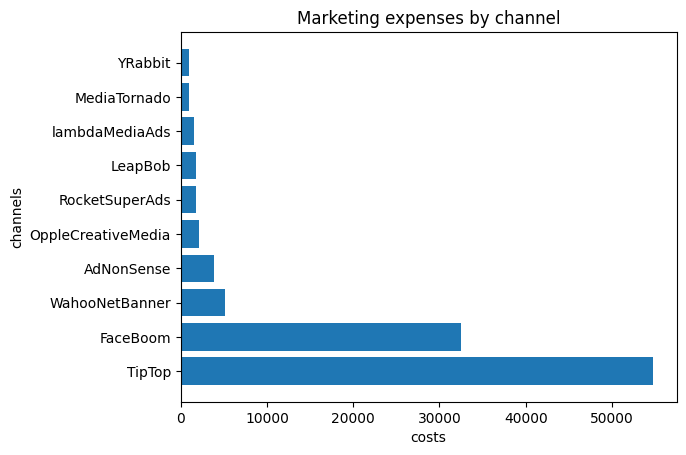

In [30]:
plt.barh(data=channel_costs, y='channel', width = 'costs')
plt.title('Marketing expenses by channel')
plt.xlabel('costs')
plt.ylabel('channels')
plt.show()

The largest amount of advertising budget was spent on TipTop, FaceBoom takes second place in terms of advertising costs.  
The budget of other advertising sources is several times lower than theirs.

### Advertising expenses over time ###
visualization of the dynamics of changes in expenses over time (by weeks and months) for each source

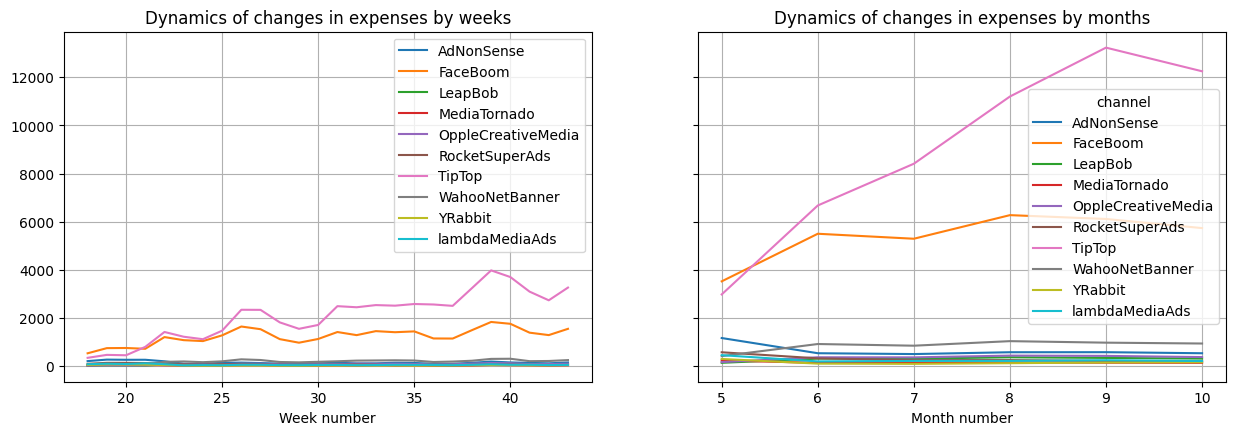

In [31]:
costs_week = costs.pivot_table(
    index='week',
    columns='channel',
    values = 'costs',
    aggfunc='sum'
    )
costs_month = costs.pivot_table(
    index='month',
    columns='channel',
    values = 'costs',
    aggfunc='sum'
    )

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
costs_week.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Week number')
plt.title('Dynamics of changes in expenses by weeks')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
costs_month.plot(grid=True, ax=ax2)
plt.xlabel('Month number')
plt.title('Dynamics of changes in expenses by months')

plt.show()

If we look at the dynamics of expenses month by month, we observe a trend of monthly growth in advertising campaign expenses in TipTop, peaking in September, followed by a decline.

The weekly chart indicates a general trend of increasing or decreasing advertising expenses in both FaceBoom and TipTop.

Let's look on dynamic of expenses without top channels: FaceBoom and TipTop. To see, if there are any trends.

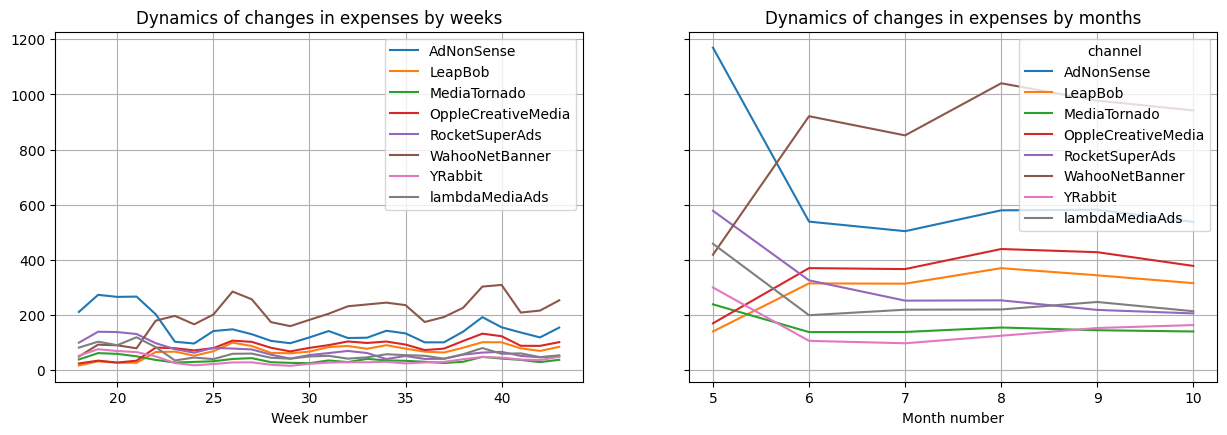

In [32]:
costs_week = costs.pivot_table(
    index='week',
    columns='channel',
    values = 'costs',
    aggfunc='sum'
    ).drop(columns=['TipTop','FaceBoom'])
costs_month = costs.pivot_table(
    index='month',
    columns='channel',
    values = 'costs',
    aggfunc='sum'
    ).drop(columns=['TipTop','FaceBoom'])

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
costs_week.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Week number')
plt.title('Dynamics of changes in expenses by weeks')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
costs_month.plot(grid=True, ax=ax2)
plt.xlabel('Month number')
plt.title('Dynamics of changes in expenses by months')

plt.show()

In this context, WahooNetBanner and AdNonSense demonstrate their advertising budget volumes. WahooNet shows a growth in expenses, although not as sharply and dramatically as TipTop and FaceBoom.

### Cost of attracting one user (CAC) ###
Let's see, how much did it cost on average to acquire one user (CAC) from each source.

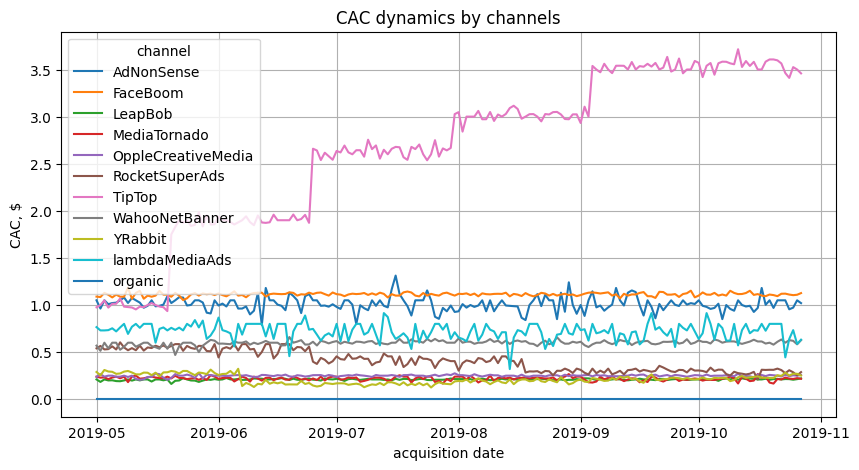

In [33]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('acquisition date')
plt.title('САС dynamics by channels')
plt.show()

In [34]:
channel_cac = profiles.pivot_table(
    index='channel',values='acquisition_cost', aggfunc='mean'
).round(1).sort_values(by='acquisition_cost',ascending=False)
channel_cac['mean_cac'] = channel_cac['acquisition_cost'].mean().round(1)
channel_cac

acquisition_cost  mean_cac
channel                                       
TipTop                           2.8       0.7
FaceBoom                         1.1       0.7
AdNonSense                       1.0       0.7
lambdaMediaAds                   0.7       0.7
WahooNetBanner                   0.6       0.7
RocketSuperAds                   0.4       0.7
LeapBob                          0.2       0.7
MediaTornado                     0.2       0.7
OppleCreativeMedia               0.2       0.7
YRabbit                          0.2       0.7
organic                          0.0       0.7


Average CAC across all channels is 70 cents.  
Tip Top has the highest cost of attracting a client - 2.8 dollars, the average cost of acquiring one client of FaceBoom is 1.1 dollars.  
Both channels have above-average CAC, with TipTop 4 times the average.  
The lowest CAC is 20 cents for advertising channels: LeapBob, MediaTornado, OppleCreativeMedia and YRabbit.


## Return on advertising ##

Let's analyze the return on advertising.
As part of the task, we believe that November 1, 2019 is on the calendar, and the business plan stipulates that users should pay no later than two weeks after attracting.

In [35]:
#remove organic users
profiles = profiles.query('channel != "organic"')

In [36]:
#set the date and horizon days
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

### Advertising payback ###
Let's analyze the payback of advertising using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.

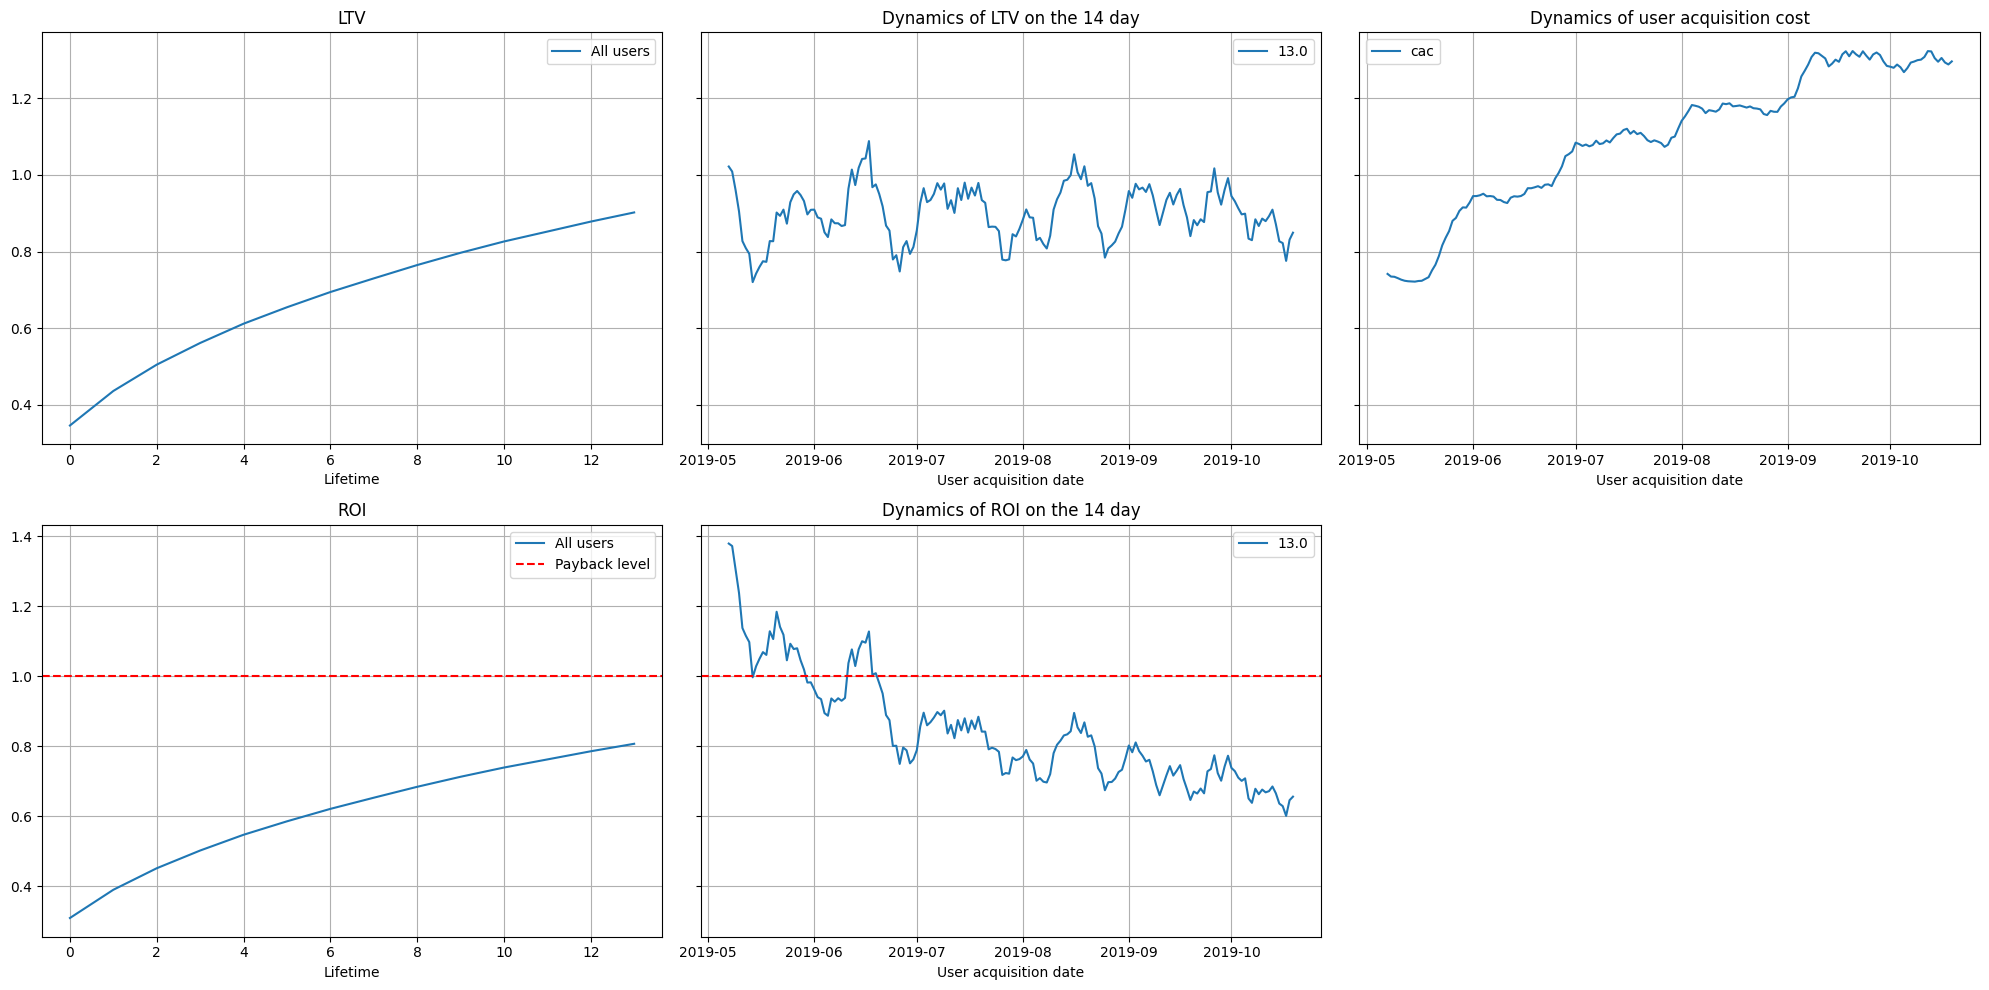

In [37]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- According to the business plan's established timeline, advertising does not break even within two weeks, reaching only 80% of breakeven by the end of this period.
- The cost of customer acquisition increases throughout the analyzed period. A sharp increase is observed in June, followed by a steady rise, averaging $1.3 per acquired customer.  
- LTV dynamics exhibit seasonality, but overall, this metric steadily increases throughout the entire period.

### User conversion and retention. ###
Let's check conversion and retention of users and their changes over the time.

#### Conversion ####

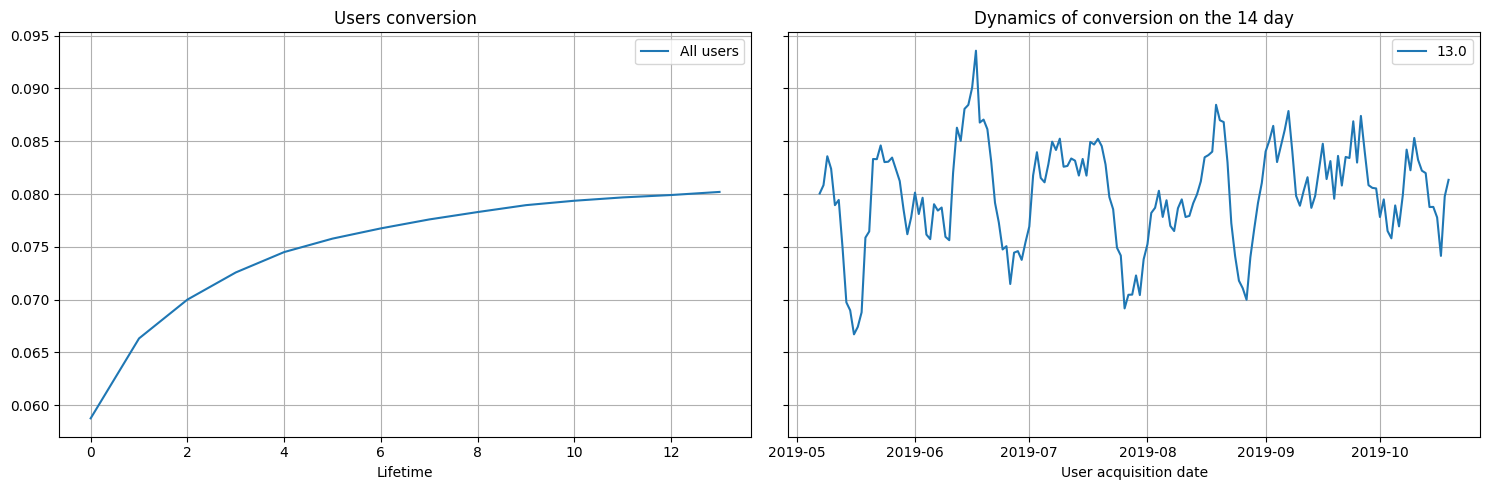

In [38]:
#conversion
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

The conversion rate is growing, but with 4 Lifetime its growth is slowing down and changing very little.  
If you look at the dynamics over the 14th day, then there is a seasonality with peaks from the middle of the month. The highest conversion rate was in mid-June.

#### Retention ####

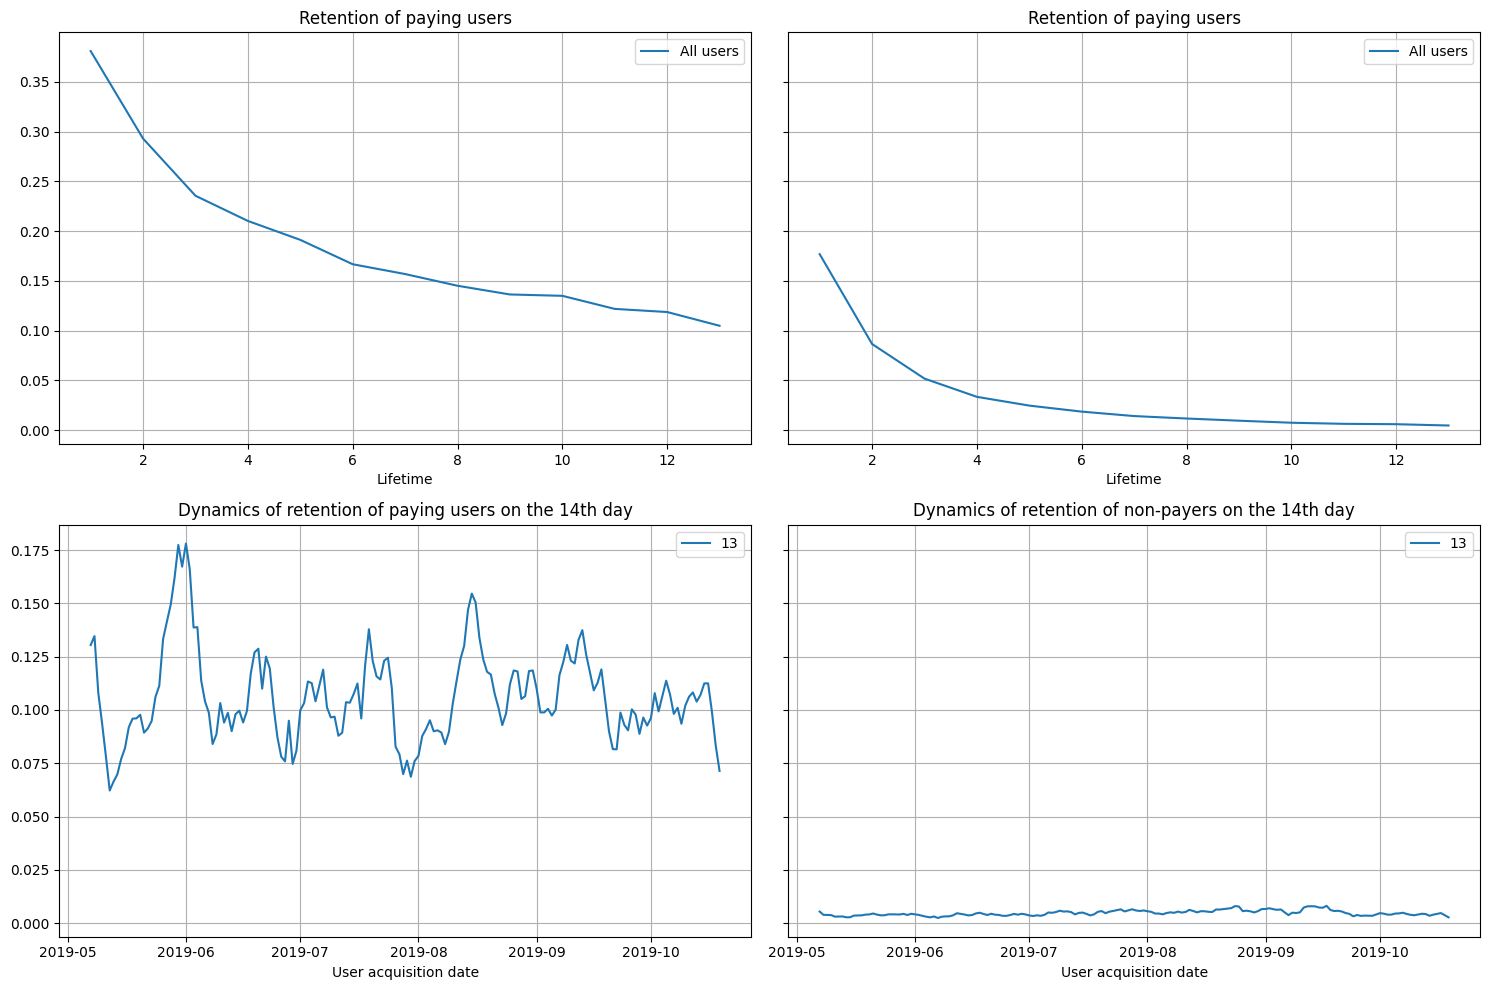

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

Retention of paying users is better than non-paying ones, which is a typical situation.

#### Conversion and retention by countries. ####


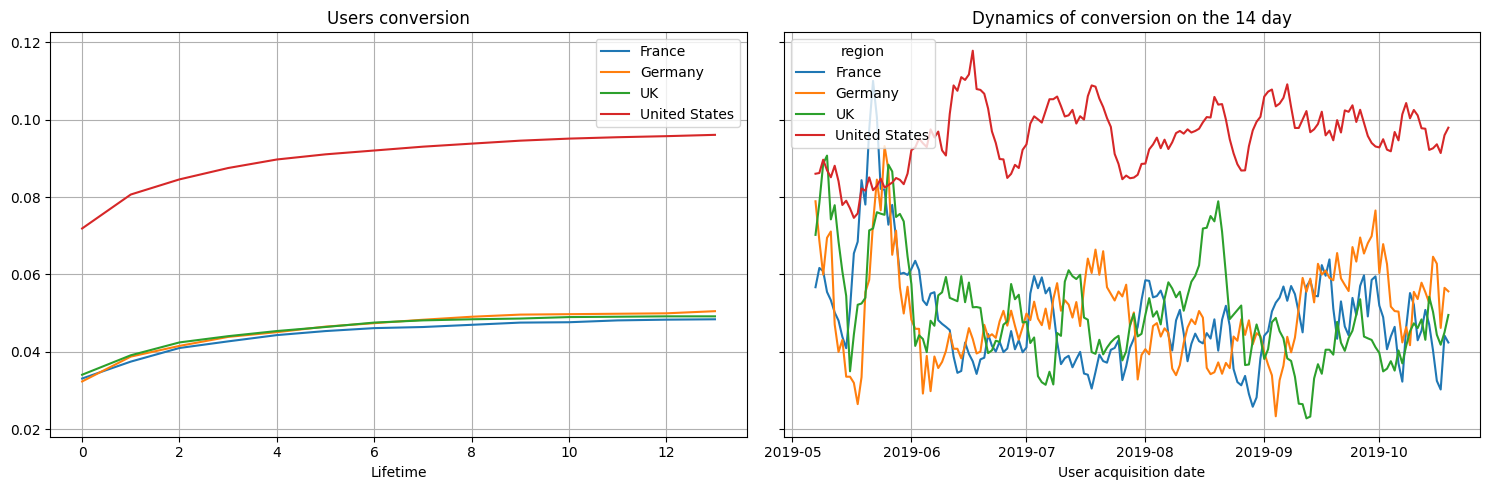

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

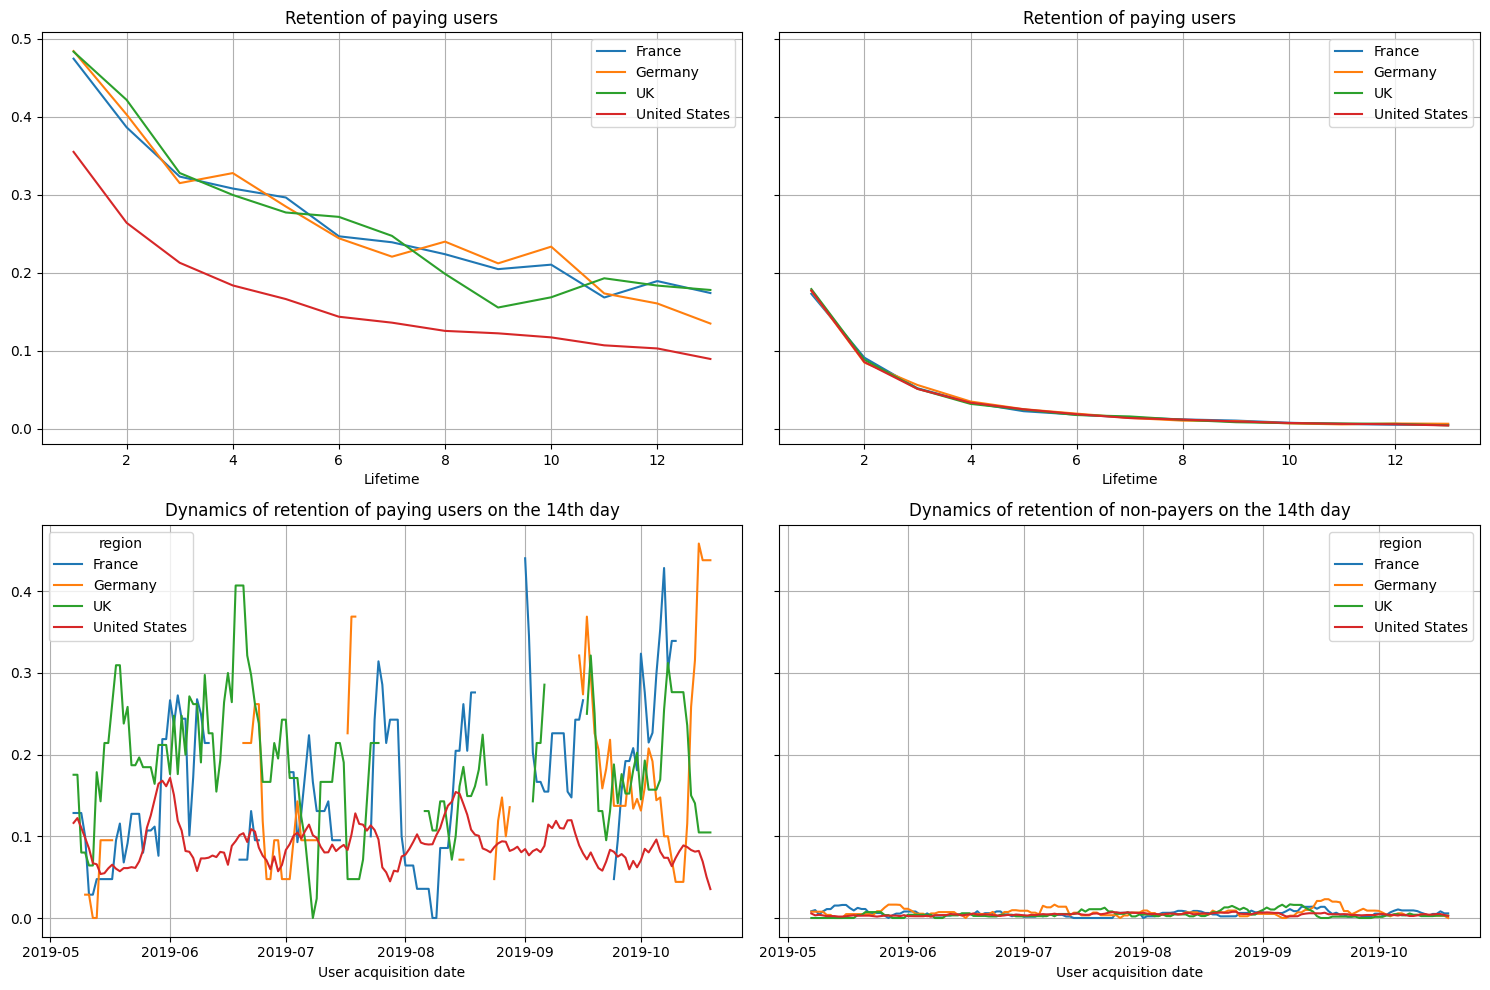

In [41]:
#retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

With high conversion rates, the United States has problems with user loyalty - it has the lowest level of retention of paying users among all countries.

#### Conversion and retention by devices. ####

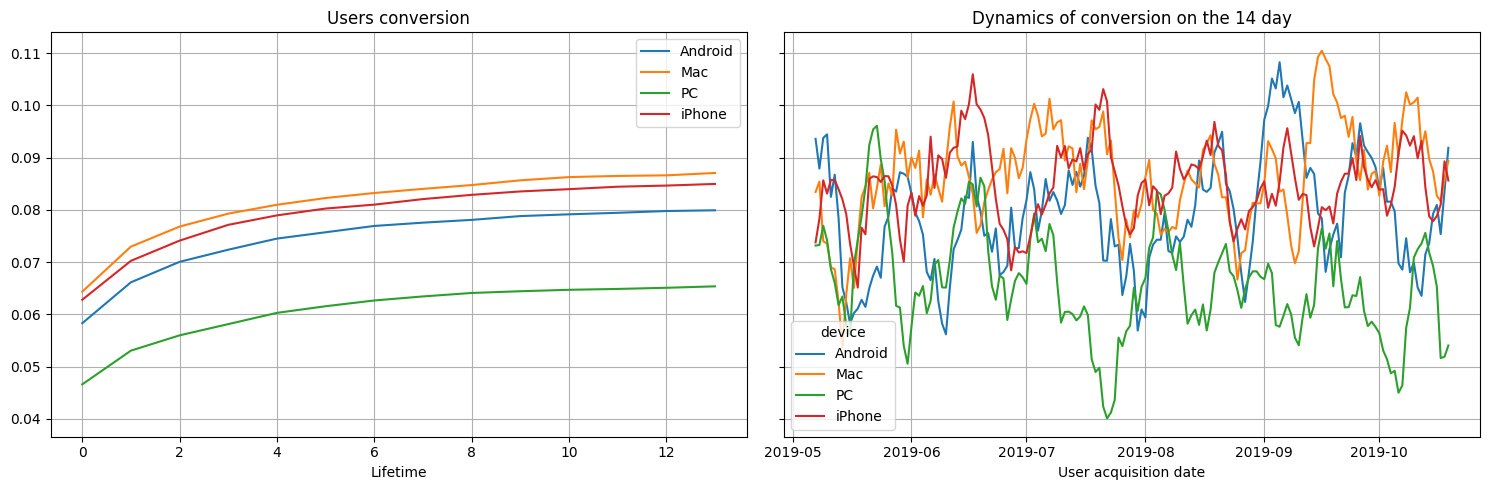

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

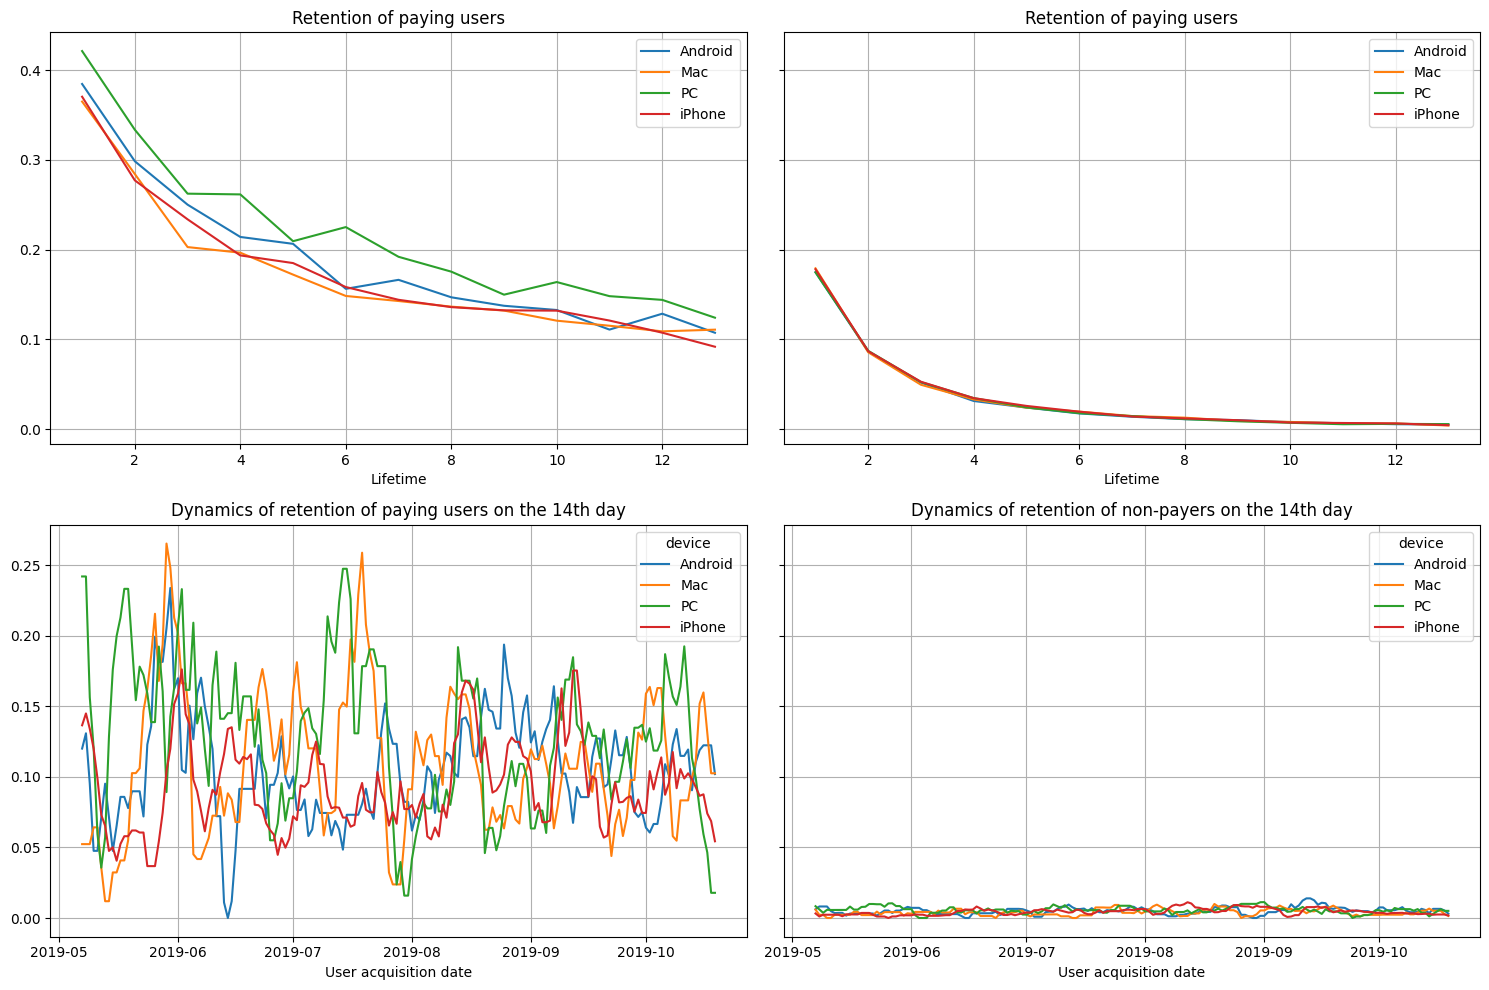

In [43]:
#retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Apple users convert better than Android users and regular PCs, but the retention rate over all Lifetimes is lower.

#### Conversion and retention by channels. ####

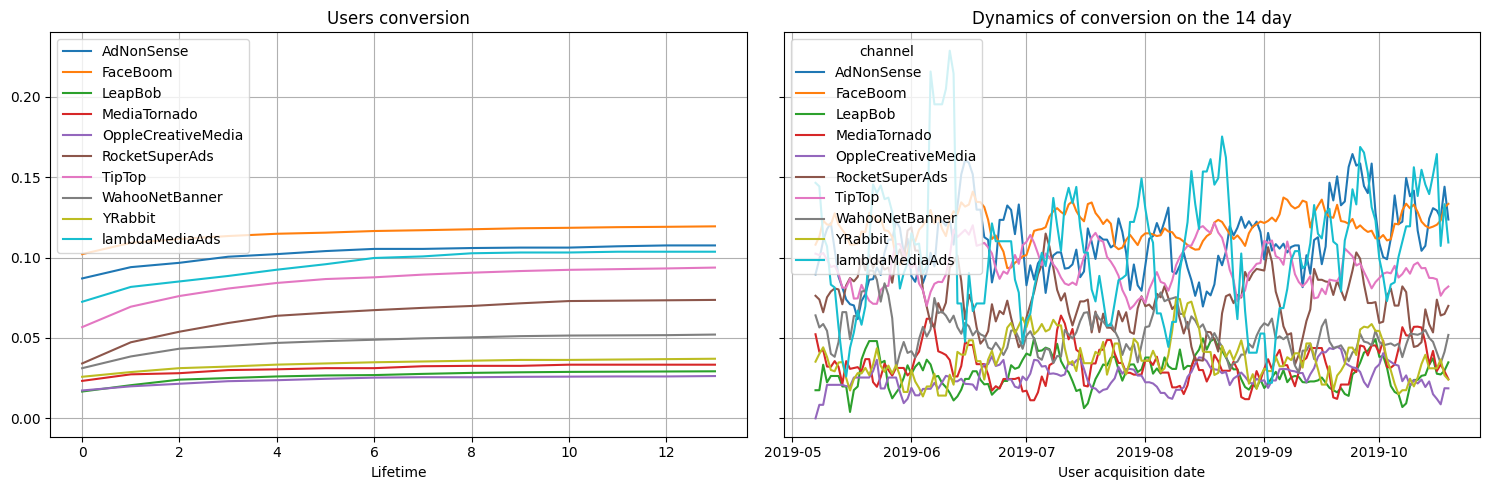

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

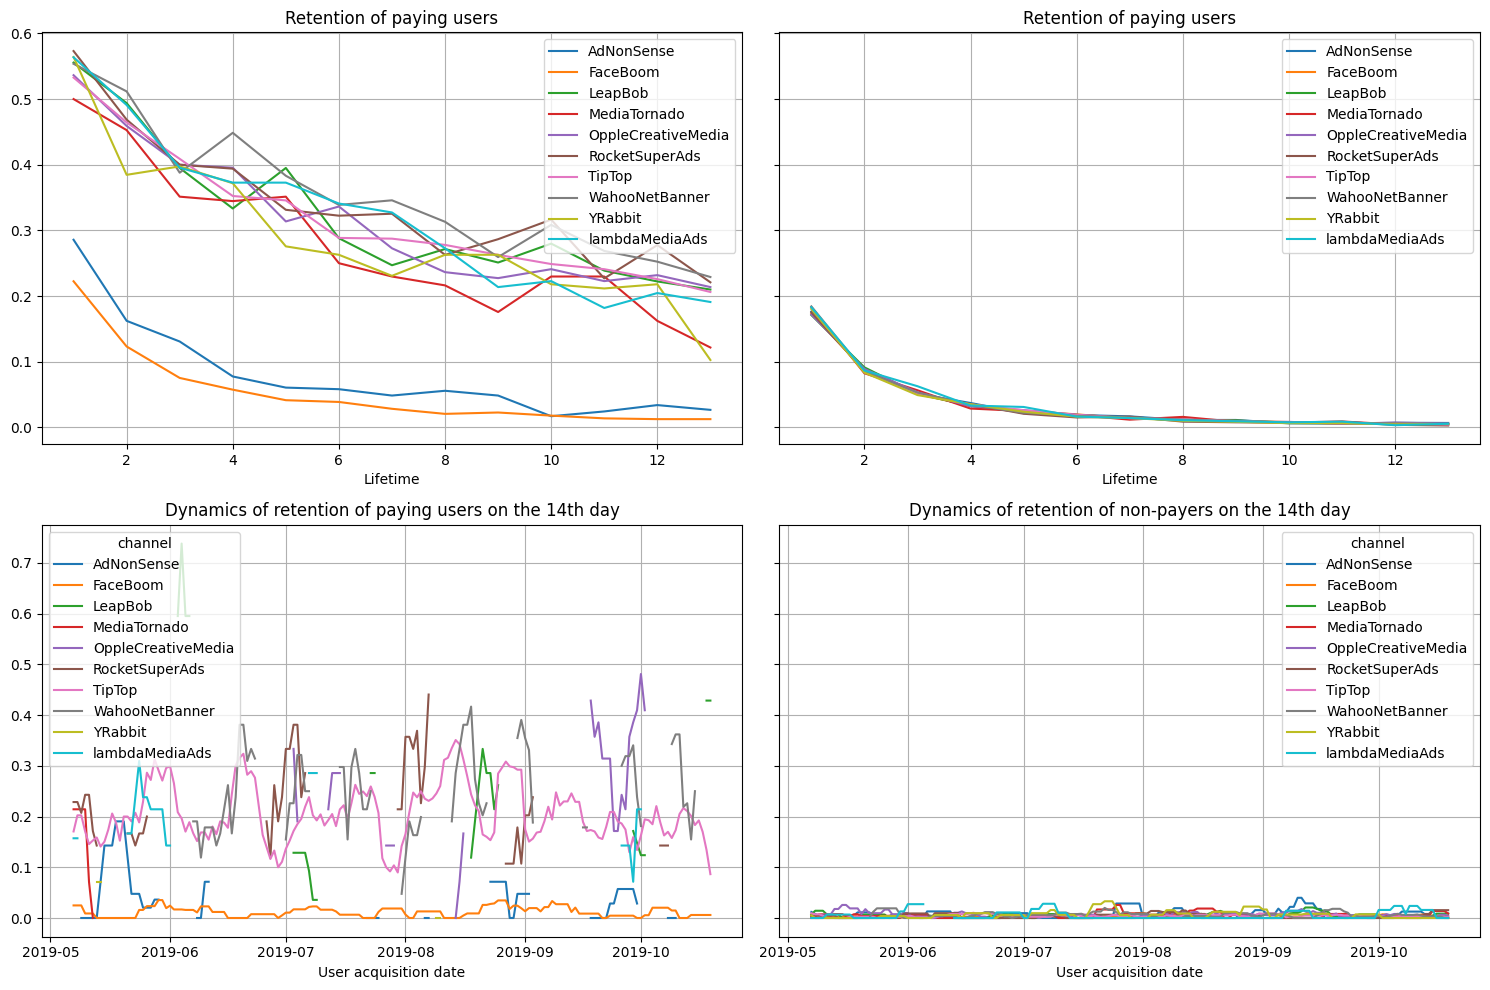

In [45]:
#retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Similar dynamics: conversion leaders fail to retain customers.  
Despite the leadership in conversion, clients from AdNonSense and FaceBoom are the worst retained.   
Good customer retention rate with WahooNet.

### Returns on investment by device. ###
Let's analyze the advertising payback broken down by devices based on LTV and ROI graphs, as well as the dynamics graphs of LTV, CAC, and ROI.

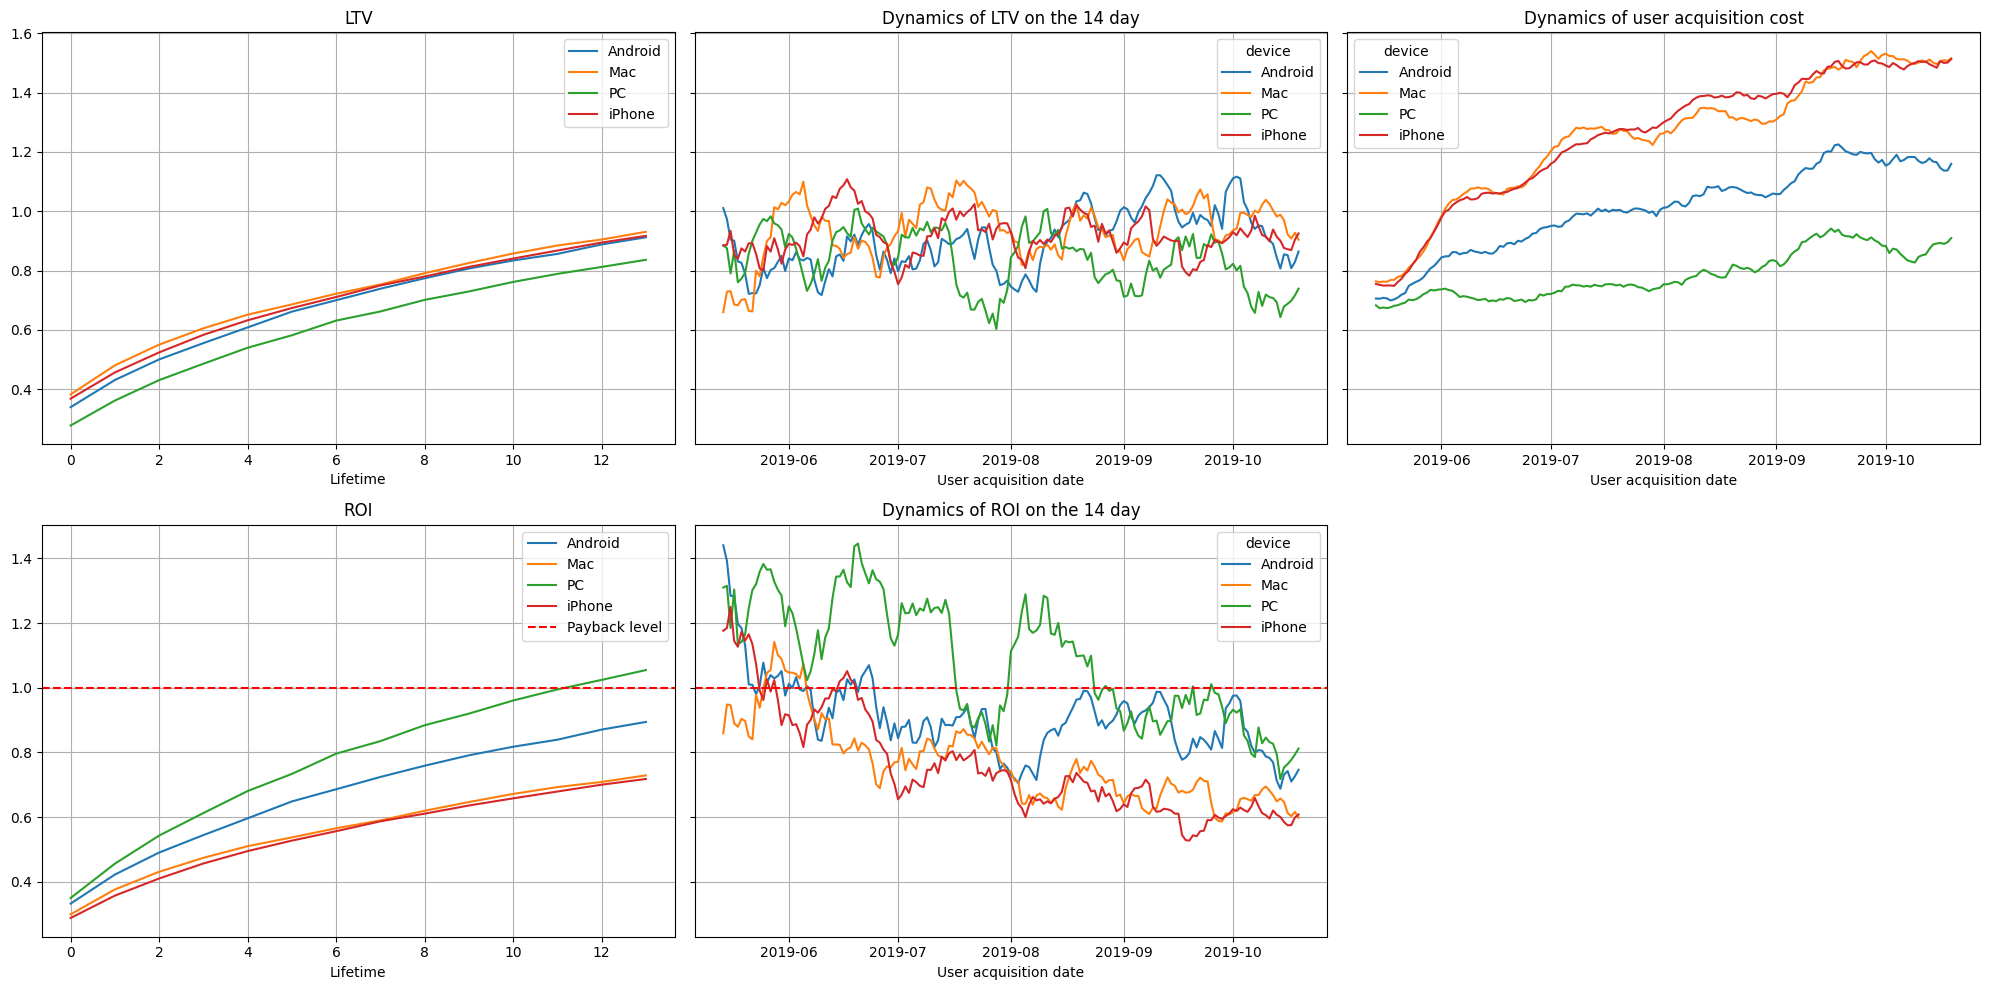

In [46]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Only the PC can be called successful in terms of payback, but this device has the lowest value and is the cheapest, while the most expensive Apple devices pay off the worst, but the payback dynamics look bad everywhere.

### Returns on investment by countries. ###


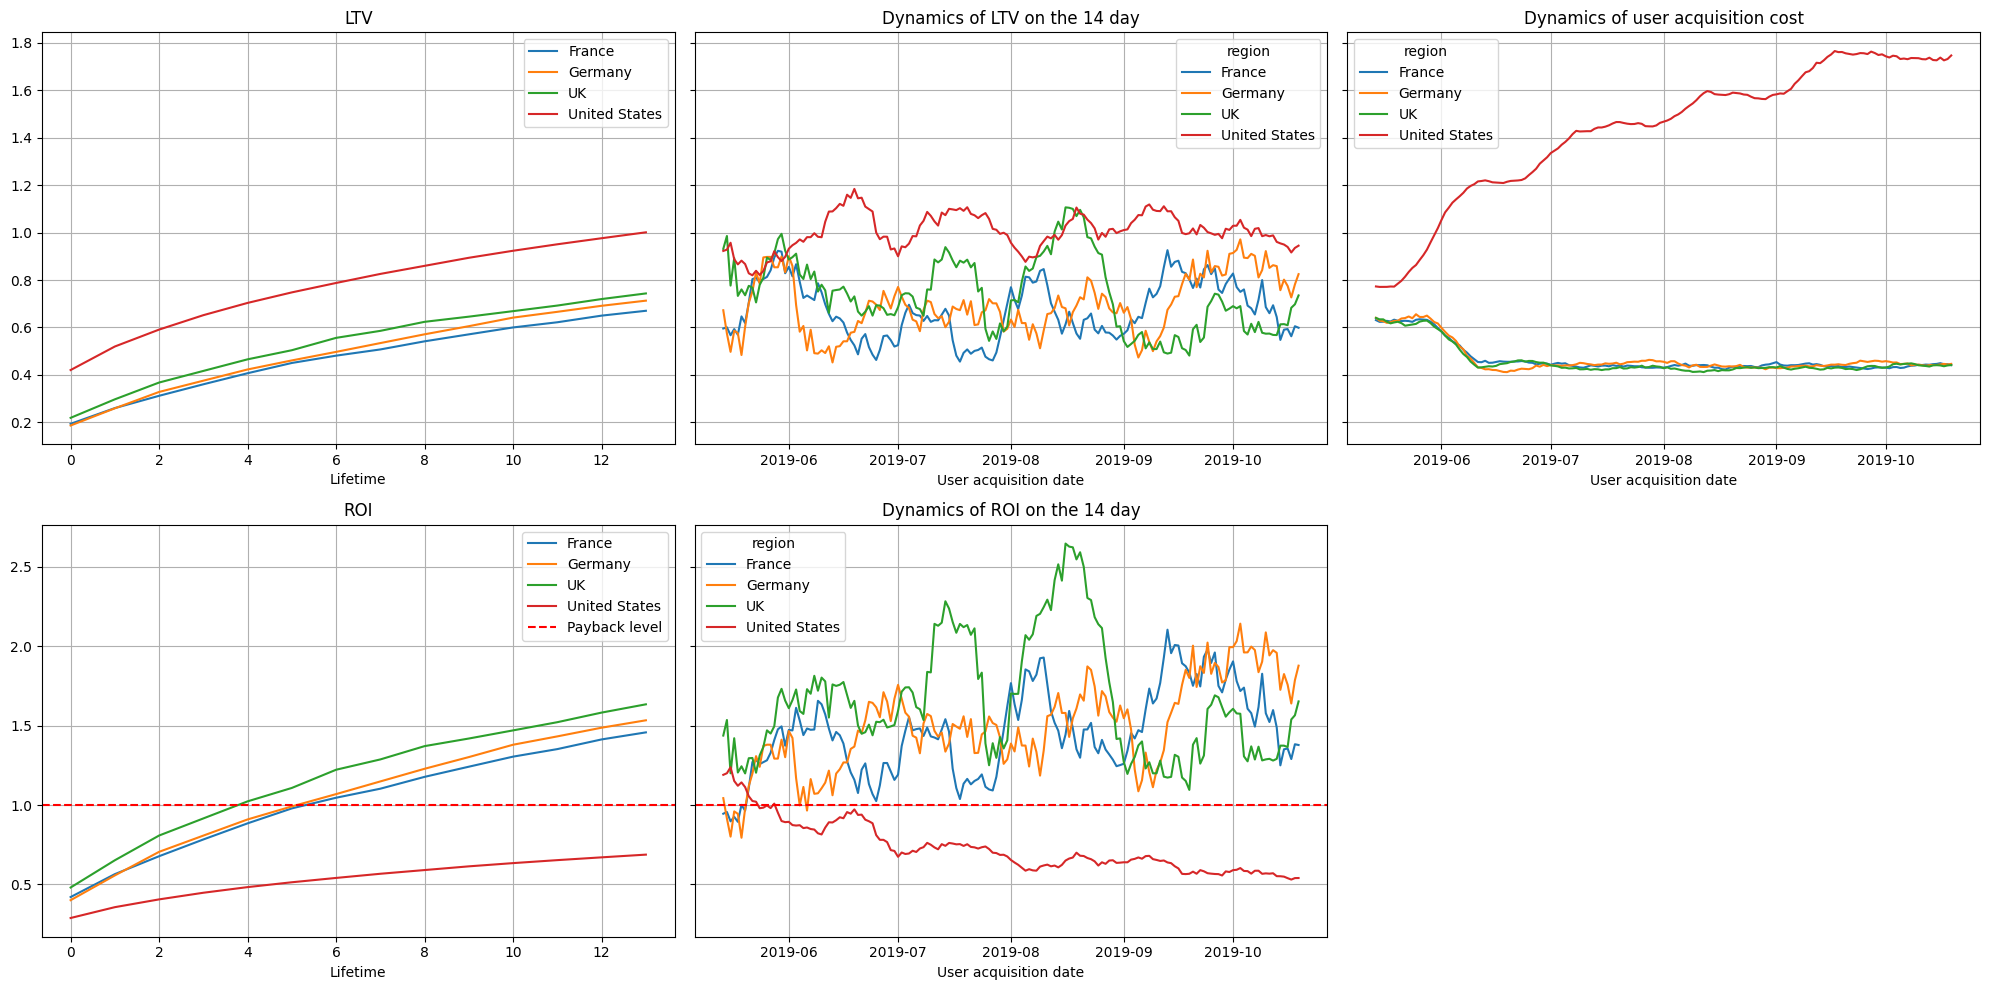

In [47]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

US customers have the highest LTV, but attracting these customers costs the company many times more than attracting customers from other countries.  

Therefore, advertising campaigns launched across America are the only ones that do not pay off throughout Lifetime

### Returns on investment by channels. ###

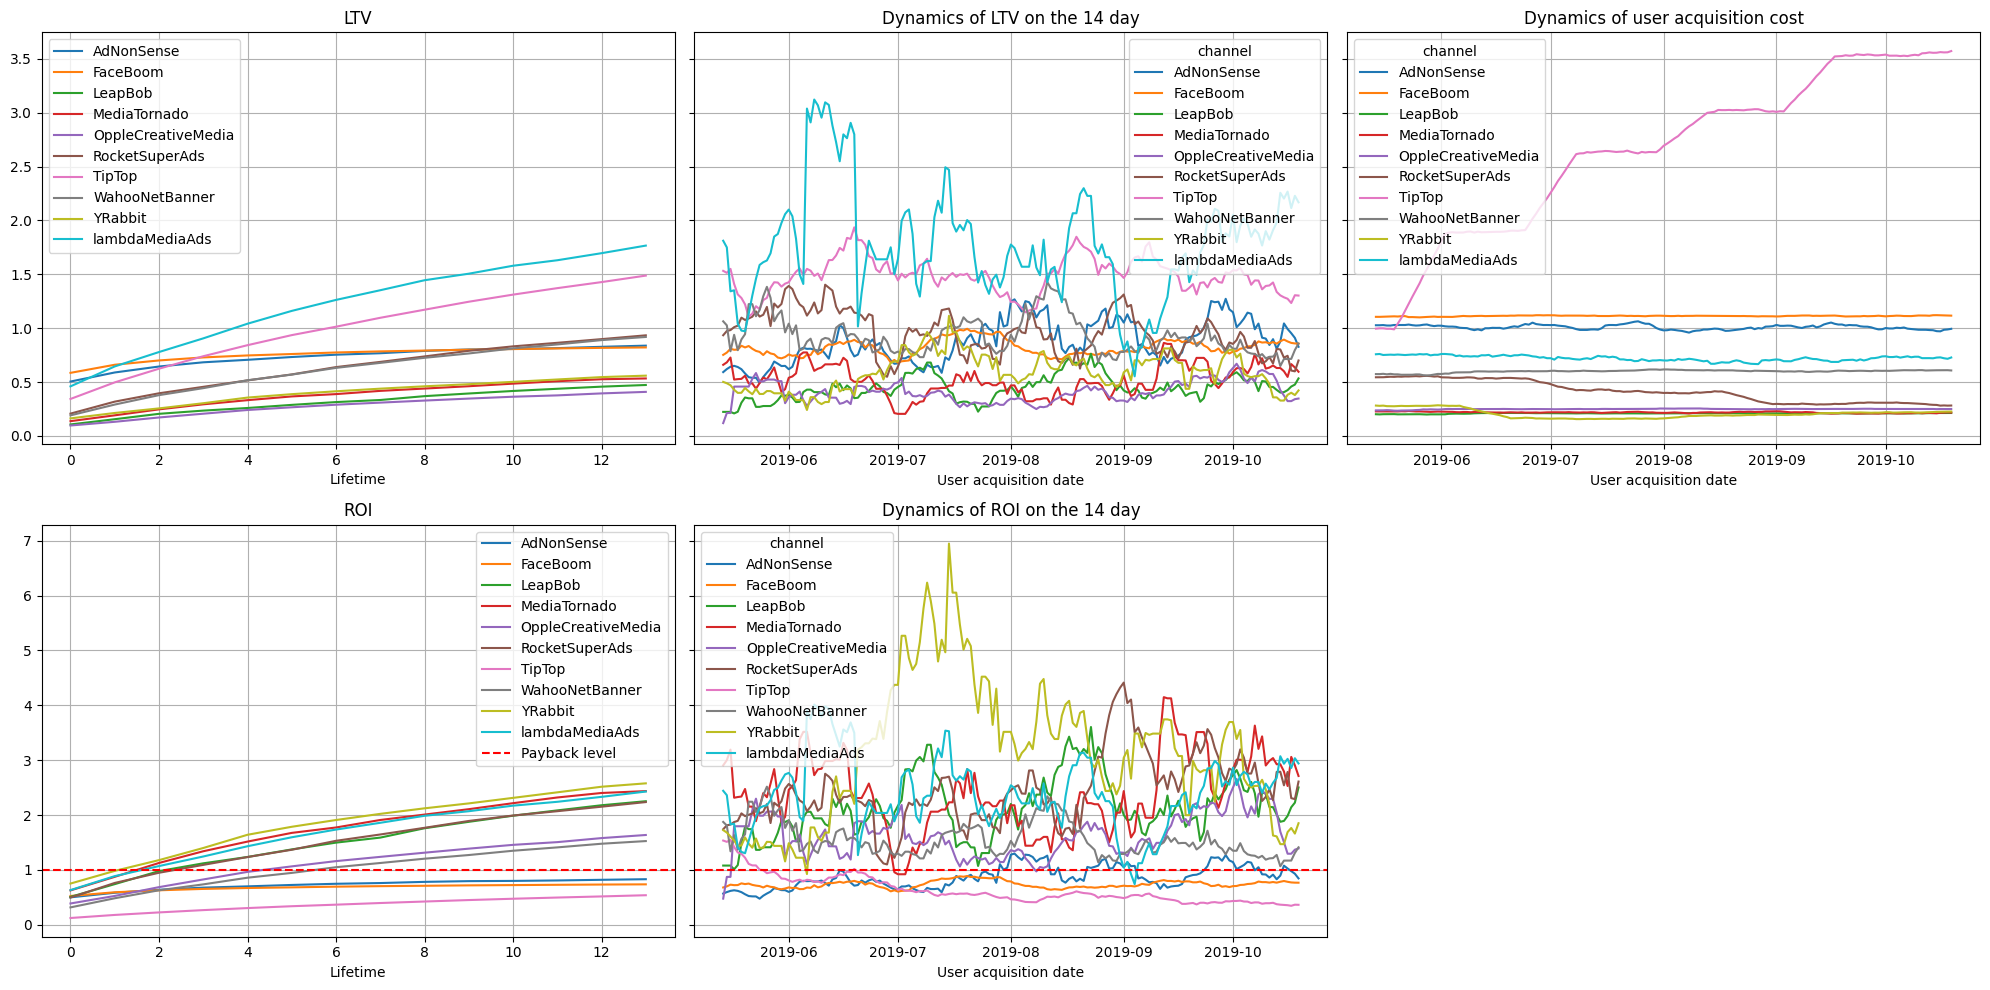

In [48]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Stable growth in LTV is observed among clients from lambdaMediaAds and TipTop.

TipTop exhibits the highest customer acquisition cost, which has been increasing throughout the entire analysis period. The acquisition cost for other channels has remained stable.

When broken down by channels, we observe that only three advertising sources failed to break even, namely TipTop, FaceBoom, and AdNonSense.

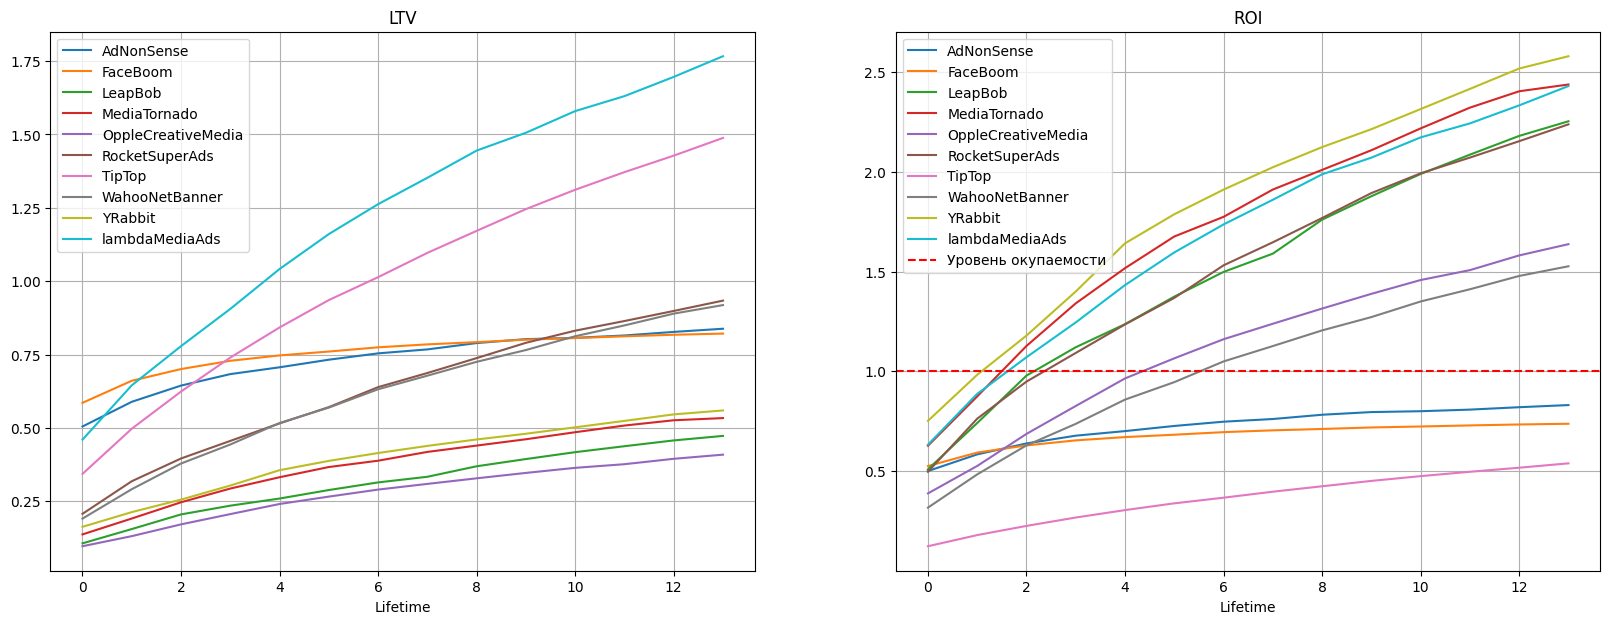

In [49]:
#let's look closer on LTV and ROI
plt.figure(figsize=(20, 7))

ltv = ltv_grouped.drop(columns=['cohort_size'])
ax1 = plt.subplot (1,2,1)
ltv.T.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Lifetime')
plt.title('LTV')

roi = roi_grouped.drop(columns=['cohort_size', 'cac'])
ax2 = plt.subplot (1,2,2)
roi.T.plot(grid=True, ax=ax2)
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Lifetime')
plt.title('ROI')

plt.show()

Marketologists should pay attention to the following promotion channels:

- lambdaMediaAds (highest LTV and good ROI)
- YRabbit (highest profitability, albeit with a not very high LTV)
- It's worth taking a closer look and working with OppleCreative and WahooNet, as although they started to break even slightly later, their LTV levels are higher and grow faster than those of YRabbit.


### Results of analysis ###

- Overall, the advertising campaign launched from May 2019 to October 2019 did not break even. Within the established business timeframe of two weeks, the breakeven point was not reached, although it came very close.  
Analyzing the dynamics, only until mid-June did the advertising break even on a 14-day Lifetime, after which there was a decrease in the ROI indicator, correlating with the increase in customer acquisition cost.
- Negative impacts on breakeven are observed from users with iPhone and Mac devices, as well as from customers in America and those who came through the TipTop advertising channel.
- Breakeven issues may be related to the metrics marketers focus on when evaluating advertising campaigns. In this case, attention may have been predominantly given to metrics such as LTV, the number of acquired users, and the conversion rate to paying users, while the cost per acquisition and ROI were not adequately assessed.

## Conclusions and recommendations ##

- The advertising campaign was ineffective as a result of attracting paying users at a very high price, which did not allow reaching the payback level. Marketers did not track the channels, devices and countries in which CAC growth occurred. Good conversion rates and LTV were misleading, and as a result, the moment of irrational growth of advertising budgets was missed.
- Overall recommendation: Regularly evaluate not only conversion rates, LTV, and average ad spending but also analyze ad spend and ROI considering various additional dimensions: acquisition channels, countries, devices, etc.  

 **Recommendations for the marketing department:**
   - **By countries**  
    Reduce budgets for acquiring users from the USA since they already represent a significant share of all customers, and their acquisition cost is too high for the company.   
    Focus on the UK and Germany, where users convert well into paying customers, with significantly lower acquisition costs and decent retention rates.
   - **By devices**  
    Shift focus away from Apple users to other platforms. Specifically, PC users were the only ones who proved profitable for the business and have a good retention rate of paying customers. Work on improving conversion rates for this user segment.
   - **By channels**  
    Reduce budgets for FaceBoom and TipTop as these customers are too costly for the business and fail to break even. Despite FaceBoom's good conversion rates, their paying customers have very poor retention. TipTop customers are significantly more expensive than others, although they do not stand out in other metrics.  
    Focus on lambdaMediaAds, as it brings in a small audience but over 10% of acquired customers become paying, boasting the highest LTV and good profitability.  
    Additionally, consider testing an increased budget for YRabbit – it has a low cost of acquisition, a decent retention rate of paying customers, and currently exhibits the highest breakeven, although with not very high LTV.  